In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd

import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
# plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

In [2]:
# set up basic data

cf_s = 0.2
cf_w = 0.35
cf_n = 0.93

cost_s = 0.811
cost_w = 1.411

demand_2019 = 138 # TWh
nuc_gen_2019 = 98.7 # TWh
TWh_to_GW = 8.76
cap_needed = (demand_2019-nuc_gen_2019)/TWh_to_GW
print(f'Remaining Capacity: {cap_needed} GW')

# max
max_wind = cap_needed/cf_w
max_solar = cap_needed/cf_s
print(f'Max solar: {max_solar}, Max wind: {max_wind}')

Remaining Capacity: 4.486301369863013 GW
Max solar: 22.431506849315063, Max wind: 12.818003913894325


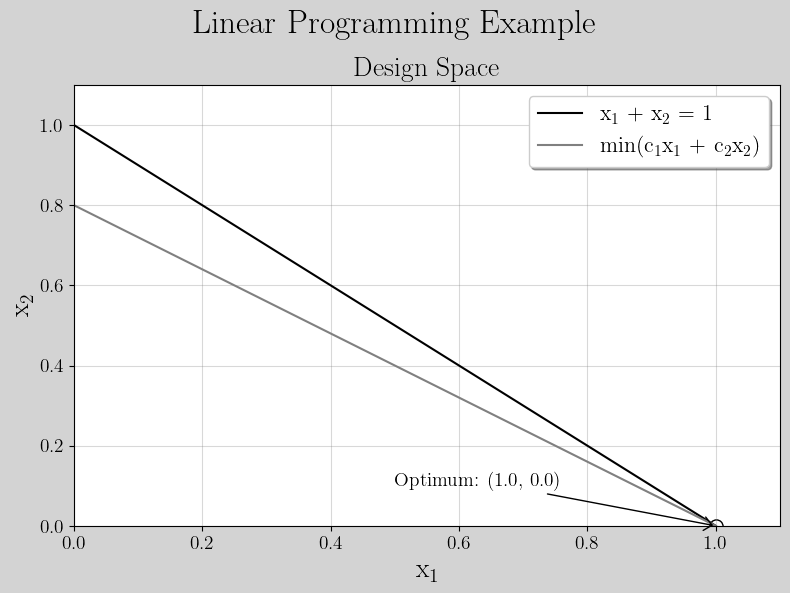

In [5]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')

max_wind = 1.0
max_solar = 1.0
cost_s = 1.0
cost_w = 0.8
px1 = np.array([max_solar,0])
px2 = np.array([0, max_wind])
cx1 = np.array([cost_s*max_solar, 0])
cx2 = np.array([0, cost_w*max_wind])
slack = 0.1
slacked_x1 = cx1*(1+slack)
slacked_x2 = cx2*(1+slack)
opt1 = (1.0,0.0)
opt2 = (16.65, 3.28)
ax.plot(px1, px2, label='x$_1$ + x$_2$ = 1', linestyle='-', color='k')
ax.plot(cx1, cx2, label='min(c$_1$x$_1$ + c$_2$x$_2$)', color='gray')
# ax.plot(slacked_x1, slacked_x2, label='c$_1$x$_1$ + c$_2$x$_2$ $\leq c_1\cdot$slack', color='gray', linestyle='--')
ax.set_ylim(0, max_wind*(1+slack))
ax.set_xlim(0, max_solar*(1+slack))
# ax.fill_between(px1, px2, max_wind, alpha=0.2, label='Feasible Space')
# ax.scatter(x=17, y=6.3, c='tab:red', label='CEJA Goal', s=90)
# ax.scatter(x=opt2[0], y=opt2[1], c='w', label='MGA Solution', edgecolor='k', linewidth=1, s=90)
ax.scatter(x=opt1[0],y=opt1[1], color='k', marker='o', s=90, facecolor='w')
# ax.minorticks_on()
# ax.grid(which='minor', linestyle='--', color='gray', alpha=0.4)
ax.grid(which='major', linestyle='-', color='gray', alpha=0.3)
ax.legend(loc='upper right', fancybox=True, shadow=True, facecolor='w',fontsize=16)
ax.set_xlabel('x$_1$',fontsize=20)
ax.set_ylabel('x$_2$',fontsize=20)
# ax.set_title('What\'s the Optimal Mix of Renewable Energy? \nDemonstration of Modelling to Generate Alternatives',
#              fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
# ax.arrow(x=cx1[0]-1,y=cx1[1]+1, dx=slacked_x1[0]*0.97-cx1[0],dy=slacked_x1[1]-cx1[1], width=0.1, color='k')

ax.annotate(f'Optimum: {opt1}', opt1, xycoords='data', xytext=(opt1[0]-0.5, opt1[1]+0.1), arrowprops=dict(facecolor='k',
                                                                                                      arrowstyle='->, head_width=0.35'),
            fontsize=14)
# ax.annotate(f'MGA Solution: {opt2}', opt2, xycoords='data', xytext=(opt2[0]-8, opt2[1]-1), arrowprops=dict(facecolor='k',
#                                                                                                       arrowstyle='->, head_width=0.35'),
#             fontsize=14)
ax.set_facecolor('w')
fig.suptitle("Linear Programming Example", fontsize=24)
ax.set_title('Design Space', fontsize=20)
plt.tight_layout()
# plt.savefig('../../pres/images/simple_esom_lp.pgf')

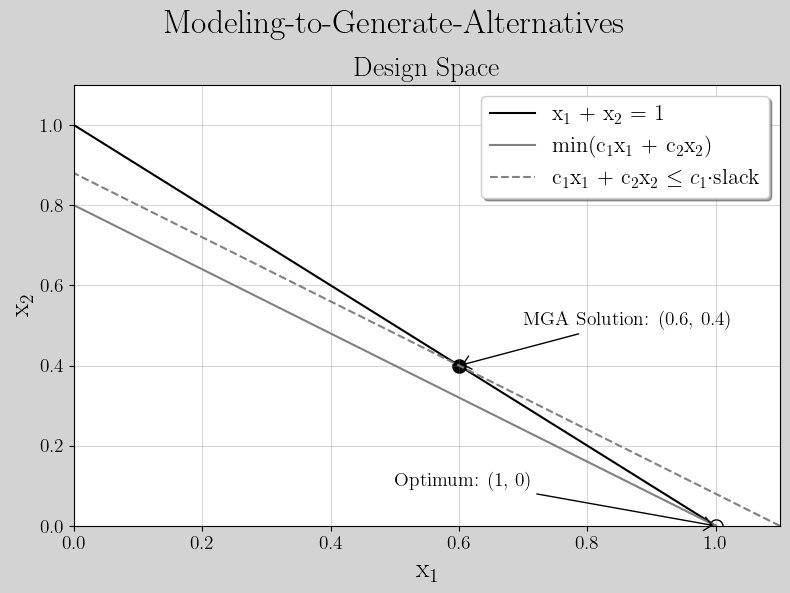

In [6]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')

max_wind = 1.0
max_solar = 1.0
cost_s = 1.0
cost_w = 0.8
px1 = np.array([max_solar,0])
px2 = np.array([0, max_wind])
cx1 = np.array([cost_s*max_solar, 0])
cx2 = np.array([0, cost_w*max_wind])
slack = 0.1
slacked_x1 = cx1*(1+slack)
slacked_x2 = cx2*(1+slack)
opt1 = (1,0)
opt2 = (0.6, 0.4)
ax.plot(px1, px2, label='x$_1$ + x$_2$ = 1', linestyle='-', color='k')
ax.plot(cx1, cx2, label='min(c$_1$x$_1$ + c$_2$x$_2$)', color='gray')
ax.plot(slacked_x1, slacked_x2, label='c$_1$x$_1$ + c$_2$x$_2$ $\leq c_1\cdot$slack', color='gray', linestyle='--')
ax.set_ylim(0, max_wind*(1+slack))
ax.set_xlim(0, max_solar*(1+slack))
# ax.fill_between(px1, px2, max_wind, alpha=0.2, label='Feasible Space')
# ax.scatter(x=17, y=6.3, c='tab:red', label='CEJA Goal', s=90)
ax.scatter(x=opt2[0], y=opt2[1], c='k', label='', facecolor='k', linewidth=1, s=90)
ax.scatter(x=opt1[0],y=opt1[1], color='k', marker='o', s=90, facecolor='w')
# ax.minorticks_on()
# ax.grid(which='minor', linestyle='--', color='gray', alpha=0.4)
ax.grid(which='major', linestyle='-', color='gray', alpha=0.3)
ax.legend(loc='upper right', fancybox=True, shadow=True, facecolor='w',fontsize=16)
ax.set_xlabel('x$_1$',fontsize=20)
ax.set_ylabel('x$_2$',fontsize=20)
# ax.set_title('What\'s the Optimal Mix of Renewable Energy? \nDemonstration of Modelling to Generate Alternatives',
#              fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=14)
# ax.arrow(x=cx1[0]-1,y=cx1[1]+1, dx=slacked_x1[0]*0.97-cx1[0],dy=slacked_x1[1]-cx1[1], width=0.1, color='k')

ax.annotate(f'Optimum: {opt1}', opt1, xycoords='data', xytext=(opt1[0]-0.5, opt1[1]+0.1), arrowprops=dict(facecolor='k',
                                                                                                      arrowstyle='->, head_width=0.35'),
            fontsize=14)
ax.annotate(f'MGA Solution: {opt2}', opt2, xycoords='data', xytext=(opt2[0]+0.1, opt2[1]+.1), arrowprops=dict(facecolor='k',
                                                                                                      arrowstyle='->, head_width=0.35'),
            fontsize=14)
ax.set_facecolor('w')
fig.suptitle("Modeling-to-Generate-Alternatives", fontsize=24)
ax.set_title('Design Space', fontsize=20)
plt.tight_layout()
# plt.savefig('../../pres/images/naive_mga_lp.pgf')

In [39]:
def get_line(x_int, y_int, n=1000):
    """
    returns x,y data for a line between 
    two specified points.
    """
    
    m = (y_int[1]-y_int[0])/(x_int[1]-x_int[0])
    y = lambda t: m*t + y_int[1]
    
    x = np.linspace(0, x_int[0], n)
    data = y(x)
    
    return x, data

In [58]:
unc = 0.02
cf_s = cf_w = 1.0
cf_s_low = cf_s*(1-unc)
cf_s_high = cf_s*(1+unc)
cf_w_low = cf_w*(1-unc)
cf_w_high = cf_w*(1+unc)

cost_s_low = cost_s*(1-unc)
cost_s_high = cost_s*(1+unc)
cost_w_low = cost_w*(1-unc)
cost_w_high = cost_w*(1+unc)

cap_needed = 1
cap_needed_low = 1*(1-unc)
cap_needed_high = 1*(1+unc)
print(f'Remaining Capacity: {cap_needed_low} to {cap_needed_high} GW')

# max
max_wind_low = cap_needed_low/cf_w_high
max_wind_high = cap_needed_high/cf_w_low
max_solar_low = cap_needed_low/cf_s_high
max_solar_high = cap_needed_high/cf_s_low

Remaining Capacity: 0.98 to 1.02 GW


In [104]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='lightgray', edgecolor='k')
# central values
px1 = np.array([max_solar,0])
px2 = np.array([0, max_wind])
px1_low = np.array([max_solar_low,0])
px2_low = np.array([0, max_wind_low])
px1_high = np.array([max_solar_high,0])
px2_high = np.array([0, max_wind_high])
x, dd = get_line(px1, px2)
x1,dd_low = get_line(px1_low, px2_low)
x2,dd_high = get_line(px1_high, px2_high)

# create common x
xfill = np.sort(np.concatenate([x1,x2]))
y1fill = np.interp(xfill, x1, dd_low)
y2fill = np.interp(xfill, x2, dd_high)

# low estimates

cx1 = np.array([cost_s*max_solar, 0])
cx2 = np.array([0, cost_w*max_wind])
cx1_low = np.array([cost_s_low*max_solar_low, 0])
cx2_low = np.array([0, cost_w_low*max_wind_low])
cx1_high = np.array([cost_s_high*max_solar_high, 0])
cx2_high = np.array([0, cost_w_high*max_wind_high])
x3, od = get_line(cx1, cx2)
x4,od_low = get_line(cx1_low, cx2_low)
x5,od_high = get_line(cx1_high, cx2_high)

# create common x
x2fill = np.sort(np.concatenate([x4,x5]))
y3fill = np.interp(x2fill, x4, od_low)
y4fill = np.interp(x2fill, x5, od_high)

# x3fill = np.sort(np.concatenate([]))


# demand constraints
ax.plot(x, dd, label='x$_1$ + x$_2$ = 1', linestyle='-', color='k')
ax.plot(x1, dd_low, label='', linestyle='--', color='lightgray')
ax.plot(x2, dd_high, label='', linestyle='--', color='lightgray')
ax.plot(x3, od, label='min(c$_1$x$_1$ + c$_2$x$_2$)', linestyle='-', color='gray')
ax.fill_between(xfill,y1fill,y2fill,alpha=0.1, color='k',label='x$_1$ + x$_2$ $\in [0.96, 1.04]$')

ax.plot([0.8,1], [0.16,0.0], color='red', label='Solution range', marker='o', markerfacecolor='w', markersize=9)
# ax.plot(x4, od_low, label='Objective Function: LB', linestyle='--', color='tab:red')
# ax.plot(x5, od_high, label='Objective Function: UB', linestyle='--', color='tab:red')
# ax.scatter(x=17, y=6.3, c='tab:red', label='CEJA Goal', s=90)


# ax.fill_between(x2fill,y3fill,y4fill,alpha=0.1, color='tab:red')
# ax.fill_between(x1,dd_low,alpha=1, color='w')
ax.legend(fancybox=True, shadow=True, facecolor='lightgray',fontsize=14)
ax.set_facecolor('w')
ax.set_ylim(0, max_wind_high)
ax.set_xlim(0, max_solar_high)
# ax.minorticks_on()
# ax.grid(which='minor', linestyle='--', color='gray', alpha=0.4)
ax.grid(which='major', linestyle='-', color='gray', alpha=0.3)
ax.legend(loc='upper right', fancybox=True, shadow=True, facecolor='w',fontsize=16)
ax.set_xlabel('x$_1$',fontsize=20)
ax.set_ylabel('x$_2$',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)

fig.suptitle("Parametric Uncertainty in ESOMs", fontsize=24)
ax.set_title('Design Space', fontsize=20)
plt.tight_layout()
plt.savefig('../../pres/images/parametric_uc_lp.pgf')